# DataBricks Exam

https://customer-academy.databricks.com/learn/course/internal/view/elearning/466/databricks-certified-associate-developer-for-apache-spark-30-for-additional-fee


The minimally qualified candidate should:

have a basic understanding of the **Spark architecture, including Adaptive Query Execution**

be able to **apply the Spark DataFrame API** to complete individual data manipulation task, including: 

    selecting, renaming and manipulating columns
    
    filtering, dropping, sorting, and aggregating rows
    
    joining, reading, writing and partitioning DataFrames
    
    working with UDFs and Spark SQL functions


**Preparation**

The following Databricks courses should help you prepare for this exam:

Apache Spark Programming with Databricks
Quick Reference: Spark Architecture
Future self-paced course on the Spark DataFrames API
Learning Spark

In addition, **Sections I, II, and IV of Spark: The Definitive Guide** and **Chapters 1-7 of Learning Spark** should also be helpful in preparation.

Before taking the exam, it is recommended that you complete the practice exam for your language of choice: Python or Scala.

boooks: https://pages.databricks.com/rs/094-YMS-629/images/LearningSpark2.0.pdf

###  DOCUMENTATION:  
    https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql.html

### Initiate Spark 

control a Spark Application through a driver process called SparkSession

1) on console: ```spark```

2) on jupyternotebook: ```jupyter notebook``` then in a cell run


In [3]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

### Spark UI 

```http://localhost:4040/jobs/```


some documentation: https://spark.apache.org/docs/latest/web-ui.html



## Ch1: What is Apache Spark

### Components


Spark offers four distinct components as libraries for diverseworkloads: 

**Spark SQL**

**Spark MLlib**, 

**Spark Structured Streaming**,

**GraphX**.



Each of these components is separate from Spark’s core fault-tolerant engine, in that you use APIs to write your Spark application and Spark converts this into a DAG that is executed by the core engine. 
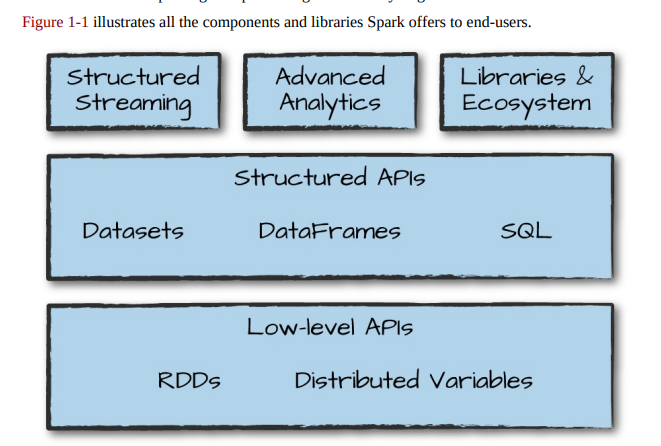

So whether you write your Spark code using the provided Structured APIs in **Java, R, Scala, SQL, or Python

#todo to 5 

#todo to 5 

# Chapter 4. Structured API Overview

The Structured APIs are a
tool for manipulating all sorts of data, from unstructured log files to semi-structured CSV files and highly structured Parquet files.

These APIs refer to three core types of distributed collection
APIs:

    Datasets

    DataFrames

    SQL tables and views

They are used to write the majority of your data flows and the majority of the Structured APIs apply to both batch and streaming computation. 

**REMEMBER:** The logical structures that we manipulate with Transformations and actions are DataFrames and Datasets. To create a new DataFrame or Dataset, you call a transformation. To start computation or convert to native language types, you call an action.

### Datsets and Dataframes 
DataFrames and Datasets are (distributed) table-like collections with well-defined rows and columns.

DataFrames and Datasets represent immutable, lazily evaluated plans that specify what operations to apply to data residing at a location to generate some output.

Tables and views are basically the same thing as DataFrames. We just execute SQL against them instead of DataFrame code.

In Spark’s supported languages, Datasets make sense only in Java and Scala, whereas in Python and R only DataFrames make sense. This is because Python and R are not compile-time type-safe; types are dynamically inferred or assigned during execution, not during compile time. 

Conceptually, you can think of a DataFrame in Scala as an alias for a collection of generic objects, Dataset[Row], where a Row is a generic untyped JVM object that may hold different types of fields. A Dataset, by contrast, is a collection of strongly typed JVM objects in Scala or a class in Java. 


depending on the languages you are working in, but there are some situations where one is preferable to the other. Here are a few examples:

• If you are an R user, use DataFrames.

• **If you are a Python user, use DataFrames and drop down to RDDs if you need more control.**

• If you want to tell Spark what to do, not how to do it, use DataFrames or Datasets.

• If you want rich semantics, high-level abstractions, and DSL operators, use DataFrames or Datasets.

• If you want strict compile-time type safety and don’t mind creating multiple case classes for a specific Dataset[T], use Datasets.

• If your processing demands high-level expressions, filters, maps, aggregations, computing averages or sums, SQL queries, columnar access, or use of relational operators on semi-structured data, use DataFrames or Datasets.

• If your processing dictates relational transformations similar to SQL-like queries, use DataFrames.

• If you want to take advantage of and benefit from Tungsten’s efficient serialization with Encoders, use Datasets.

• If you want unification, code optimization, and simplification of APIs across Spark components, use DataFrames.

• If you want space and speed efficiency, use DataFrames.

• If you want errors caught during compilation rather than at runtime, choose the appropriate API as depicted in Figure
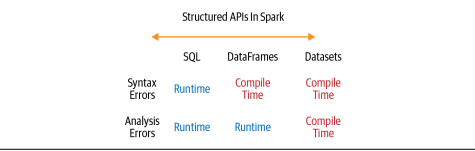









### the Spark SQL engine:
from  Learning Spark 

At a programmatic level, Spark SQL allows developers to issue ANSI SQL:2003–compatible queries on structured data with a schema. Since its introduction in Spark 1.3, Spark SQL has evolved into a substantial engine upon which many high-level structured functionalities have been built. Apart from allowing you to issue SQL-like queries on your data, the Spark SQL engine:

• Unifies Spark components and permits abstraction to DataFrames/Datasets in Java, Scala, Python, and R, which simplifies working with structured data sets.

• Connects to the Apache Hive metastore and tables.

• Reads and writes structured data with a specific schema from structured file formats (JSON, CSV, Text, Avro, Parquet, ORC, etc.) and converts data into temporary tables.

• Offers an interactive Spark SQL shell for quick data exploration.

• Provides a bridge to (and from) external tools via standard database JDBC/ODBC connectors***.

• Generates optimized query plans and compact code for the JVM, for final execution.



*** **ODBC** is an SQL-based Application Programming Interface (API) created by Microsoft that is used by Windows software applications to access databases via SQL. **JDBC** is an SQL-based API created by Sun Microsystems to enable Java applications to use SQL for database access.
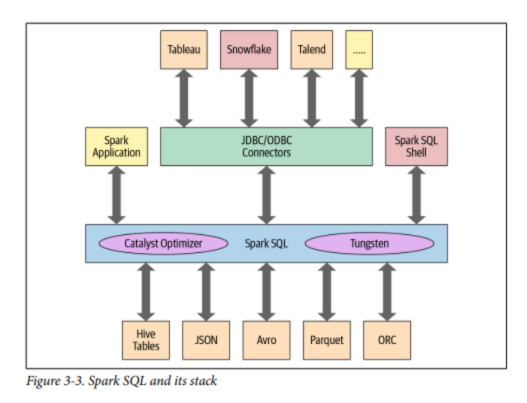




### Catalyst Optimizer or Engine

The Catalyst optimizer takes a computational query and converts it into an execution plan, going through Four Transformational Phases or Query Optimization Phases.

Documentation: https://databricks.com/blog/2015/04/13/deep-dive-into-spark-sqls-catalyst-optimizer.html

regardless of the language you use, your computation undergoes the same journey and the resulting bytecode is likely the same

In [56]:
# In Python

flights_df = spark.read.format('json').load('./data/flight-data/json/2015-summary.json')
flights_df.show()


+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|       United States|            Romania|   15|
|       United States|            Croatia|    1|
|       United States|            Ireland|  344|
|               Egypt|      United States|   15|
|       United States|              India|   62|
|       United States|          Singapore|    1|
|       United States|            Grenada|   62|
|          Costa Rica|      United States|  588|
|             Senegal|      United States|   40|
|             Moldova|      United States|    1|
|       United States|       Sint Maarten|  325|
|       United States|   Marshall Islands|   39|
|              Guyana|      United States|   64|
|               Malta|      United States|    1|
|            Anguilla|      United States|   41|
|             Bolivia|      United States|   30|
|       United States|           Paraguay|    6|
|             Algeri

In [64]:
from pyspark.sql.functions import count

count_flights_df = (flights_df
 .select("DEST_COUNTRY_NAME", "ORIGIN_COUNTRY_NAME", "count")
 .groupBy("DEST_COUNTRY_NAME", "ORIGIN_COUNTRY_NAME")
 .agg(count("count")
 .alias("Total"))
 .orderBy("Total", ascending=True))
count_flights_df.show()
count_flights_df.explain(True)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|Total|
+-----------------+-------------------+-----+
|    United States|              Egypt|    1|
|            India|      United States|    1|
|          Ireland|      United States|    1|
|        Singapore|      United States|    1|
|            Niger|      United States|    1|
|    United States|         Costa Rica|    1|
|    United States|            Senegal|    1|
|          Croatia|      United States|    1|
|           Kosovo|      United States|    1|
|          Romania|      United States|    1|
|          Grenada|      United States|    1|
|    United States|           Anguilla|    1|
|    United States|            Bolivia|    1|
| Marshall Islands|      United States|    1|
|     Sint Maarten|      United States|    1|
|    United States|              Malta|    1|
|    United States|             Guyana|    1|
|    United States|         Montenegro|    1|
|         Paraguay|      United St

#### Method ```df.explain(extended=None, mode=None)```
Prints the (logical and physical) plans to the console for debugging purpose.

Parameters:
extended: bool, optional --> default False. If False, prints only the physical plan. When this is a string without specifying the mode, it works as the mode is specified.

mode: str, optional --> specifies the expected output format of plans.

    simple: Print only a physical plan.

    extended: Print both logical and physical plans.

    codegen: Print a physical plan and generated codes if they are available.

    cost: Print a logical plan and statistics if they are available.

    formatted: Split explain output into two sections: a physical plan outline and node details.
    
    
 You can check the Execution plan also in the UI
 
 Documentation: https://developer.ibm.com/blogs/how-to-understanddebug-your-spark-application-using-explain/

## Overview of Structured API Execution
how the code is actually executed across a cluster.

From Definitive Guide [[ch. 5]]


To execute code, we must write code. This code is then submitted to Spark either through the
console or via a submitted job. This code then passes through the Catalyst Optimizer, which
decides how the code should be executed and lays out a plan for doing so before, finally, the
code is run and the result is returned to the user


###  Four Transformational Phases or Query Optimization Phases


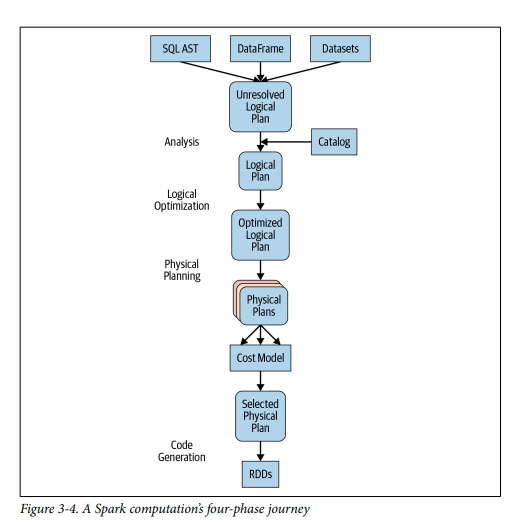

**Phase 1: Analysis**
The Spark SQL engine begins by generating an abstract syntax tree (AST) for the SQL or DataFrame query. In this initial phase, any columns or table names will be resolved by consulting an internal Catalog, a programmatic interface to Spark SQL that holds a list of names of columns, data types, functions, tables, databases, etc. Once they’ve all been successfully resolved, the query proceeds to the next phase.


**Phase 2: Logical optimization**
This phase comprises two internal stages. 
Applying a standardrule based optimization approach, the Catalyst optimizer will
1) construct a set of multiple plans and 2) using its cost-based optimizer (CBO), assign costs to each plan. 

These plans are laid out as operator trees (like in Figure 3-5); they may include,
for example, the process of constant folding, predicate pushdown, projection pruning, Boolean expression simplification, etc. This logical plan is the input into the physical plan.

**Phase 3: Physical planning**
Spark SQL generates an optimal physical plan for the selected logical plan, using physical operators that match those available in the Spark execution engine.

**Phase 4: Code generation**
generate efficient Java bytecode to run on each machine. Because Spark SQL can operate on data sets loaded in memory, Spark can use state-of-the-art compiler technology for code generation to speed up execution. In other words, it acts as a compiler. Project Tungsten, which facilitates
whole-stage code generation, plays a role here.
Just what is whole-stage code generation? It’s a physical query optimization phase that
collapses the whole query into a single function, getting rid of virtual function calls
and employing CPU registers for intermediate data. The second-generation Tungsten
engine, introduced in Spark 2.0, uses this approach to generate compact RDD code
for final execution. This streamlined strategy significantly improves CPU efficiency
and performance.

## Ch5: Basic Structured Operations to manipulate DataFrames

### Dataframes 

From Learning Spark, 

Inspired by pandas DataFrames in structure, format, and a few specific operations, **Spark DataFrames are like distributed in-memory tables with named columns and schemas**, where each column has a specific data type: integer, string, array, map, real, date, timestamp, etc.


**DataFrames are immutable and Spark keeps a lineage of all transformations**


### Some Definitions

A **DataFrame** consists of a series of records (like rows in a table), that are of type
Row, and a number of columns (like columns in a spreadsheet) that represent a computation
expression that can be performed on each individual record in the Dataset. 

**Schemas** define the name as well as the type of data in each column. 

**Partitioning of the DataFrame** defines thelayout of the DataFrame or Dataset’s physical distribution across the cluster. 

A **partitioning scheme** defines how that is allocated.

An **expression** is a set of transformations on one or more values in a record in a DataFrame. You can select, manipulate, and remove columns from DataFrames and these operations are represented as expressions.


REMEBER: column might or might not exist in our DataFrames. Columns are not resolved until we compare the column names with those we are maintaining in the catalog. Column and table resolution happens in the analyzer phase, 

### Dataframes Schemas

A schema in Spark defines the column names and associated data types for a DataFrame. Most often, schemas come into play when you are reading structured data from an external data source. 

Two ways:

1) schema-on-read (autodetect)

2) defined explicitly

benefits  of expressing it explicitly:
• You relieve Spark from the onus/duty of inferring data types.
• You prevent Spark from creating a separate job just to read a large portion of your file to ascertain the schema, which for a large data file can be expensive and time-consuming (spark sample the data to infer the schema).
• You can detect errors early if data doesn’t match the schema.

#### Two ways to define a schema
1) using the Spark DataFrame API.

2) using Data Definition Language (DDL),DDL comes from SQL and is the language you use when for instance you create a table in SQL

In [65]:
# In Python: use the Spark DataFrame API.
from pyspark.sql.types import *
schema = StructType([StructField("author", StringType(), False),
 StructField("title", StringType(), False),
 StructField("pages", IntegerType(), False)])

In [66]:
# In Python: using Data Definition Language (DDL)
schema = "author STRING, title STRING, pages INT"

In [67]:
# In Python
from pyspark.sql import SparkSession
# Define schema for our data using DDL
schema = "`Id` INT, `First` STRING, `Last` STRING, `Url` STRING, `Published` STRING, `Hits` INT, `Campaigns` ARRAY<STRING>"
    
# Create our static data
data = [[1, "Jules", "Damji", "https://tinyurl.1", "1/4/2016", 4535, ["twitter",
"LinkedIn"]],
 [2, "Brooke","Wenig", "https://tinyurl.2", "5/5/2018", 8908, ["twitter",
"LinkedIn"]],
 [3, "Denny", "Lee", "https://tinyurl.3", "6/7/2019", 7659, ["web",
"twitter", "FB", "LinkedIn"]],
 [4, "Tathagata", "Das", "https://tinyurl.4", "5/12/2018", 10568,
["twitter", "FB"]],
 [5, "Matei","Zaharia", "https://tinyurl.5", "5/14/2014", 40578, ["web",
"twitter", "FB", "LinkedIn"]],
 [6, "Reynold", "Xin", "https://tinyurl.6", "3/2/2015", 25568,
["twitter", "LinkedIn"]]
 ]

# Create a DataFrame using the schema defined above
blogs_df = spark.createDataFrame(data, schema)
# Show the DataFrame; it should reflect our table above
blogs_df.show()
# Print the schema used by Spark to process the DataFrame
blogs_df.printSchema()

+---+---------+-------+-----------------+---------+-----+--------------------+
| Id|    First|   Last|              Url|Published| Hits|           Campaigns|
+---+---------+-------+-----------------+---------+-----+--------------------+
|  1|    Jules|  Damji|https://tinyurl.1| 1/4/2016| 4535| [twitter, LinkedIn]|
|  2|   Brooke|  Wenig|https://tinyurl.2| 5/5/2018| 8908| [twitter, LinkedIn]|
|  3|    Denny|    Lee|https://tinyurl.3| 6/7/2019| 7659|[web, twitter, FB...|
|  4|Tathagata|    Das|https://tinyurl.4|5/12/2018|10568|       [twitter, FB]|
|  5|    Matei|Zaharia|https://tinyurl.5|5/14/2014|40578|[web, twitter, FB...|
|  6|  Reynold|    Xin|https://tinyurl.6| 3/2/2015|25568| [twitter, LinkedIn]|
+---+---------+-------+-----------------+---------+-----+--------------------+

root
 |-- Id: integer (nullable = true)
 |-- First: string (nullable = true)
 |-- Last: string (nullable = true)
 |-- Url: string (nullable = true)
 |-- Published: string (nullable = true)
 |-- Hits: integer (

In order to use  this schema elsewhere in your code, simply execute ```blogs_df.schema```

In [68]:
blogs_df.schema 

StructType(List(StructField(Id,IntegerType,true),StructField(First,StringType,true),StructField(Last,StringType,true),StructField(Url,StringType,true),StructField(Published,StringType,true),StructField(Hits,IntegerType,true),StructField(Campaigns,ArrayType(StringType,true),true)))

#### Schema Structure

A schema is a ```StructType``` build by ```StructField``` made of:

    1) nameColumn (ex. count)
    
    2) typeColumn (ex.LongType())
    
    3) Nullable (ex. True)
    
    4) metadata [optional] metadata={"hello":"world"})
    


#### Schema from Json file example

In [69]:
# to load and check the schema  without schema(myManulaSchema)
spark.read.format('json').load('./data/flight-data/json/2015-summary.json').schema

StructType(List(StructField(DEST_COUNTRY_NAME,StringType,true),StructField(ORIGIN_COUNTRY_NAME,StringType,true),StructField(count,LongType,true)))

In [70]:
from pyspark.sql.types import StructField, StructType, StringType, LongType

myManualSchema = StructType([
  StructField("DEST_COUNTRY_NAME", StringType(), True),
  StructField("ORIGIN_COUNTRY_NAME", StringType(), True),
  StructField("count", LongType(), False, metadata={"hello":"world"})
])
flights_df = spark.read.format("json").schema(myManualSchema)\
  .load("./data/flight-data/json/2015-summary.json")

flights_df .schema

StructType(List(StructField(DEST_COUNTRY_NAME,StringType,true),StructField(ORIGIN_COUNTRY_NAME,StringType,true),StructField(count,LongType,true)))

In [71]:
flights_df.printSchema()

root
 |-- DEST_COUNTRY_NAME: string (nullable = true)
 |-- ORIGIN_COUNTRY_NAME: string (nullable = true)
 |-- count: long (nullable = true)



### Columns

In Spark’s supported languages, columns are objects with public methods (represented by theColumn type). 

```Column``` is the name of the object, while ```col()``` is a standard built-in function that returns a Column.


In **Scala / Java API**, to return a column use 
```df.col("column_name")```,

```df.col('column_name)```,

```df("column_name")```,

```df.apply("column_name")``` 


Whereas in **pyspark** use the below to get the column from DF

```df.colName```

```df["colName"]```


**Documentation on Class ```Column``` in Scala:** https://spark.apache.org/docs/latest/api/scala/org/apache/spark/sql/Column.html


NB: Column objects in a DataFrame can’t exist in isolation; each column is part of a row in a record and all the rows together constitute a DataFrame.

In [72]:
from pyspark.sql.functions import col, column, expr

# df("someColumnName")
flights_df["DEST_COUNTRY_NAME"]
flights_df.DEST_COUNTRY_NAME


Column<'DEST_COUNTRY_NAME'>

<b>HOWEVER </b>, if using  ```select``` it is also possible to use ```col("column_name")```

In [73]:
# These statements return the same value, showing that
flights_df.select(col("DEST_COUNTRY_NAME"))
flights_df.select(expr("DEST_COUNTRY_NAME"))
flights_df.select("DEST_COUNTRY_NAME")

DataFrame[DEST_COUNTRY_NAME: string]

In [74]:
flights_df.columns #column property to access columns 

['DEST_COUNTRY_NAME', 'ORIGIN_COUNTRY_NAME', 'count']

### Rows

A row is nothing more than a record of data. Each row is a single record, represented as an object of type ```Row```. 

Internally represent arrays of bytes.

Each record in a DataFrame must be of type ```Row```, as we can see when we collect the following DataFrames. We can create these rows:
1) manually from SQL, 

2) from Resilient Distributed Datasets (RDDs), 

3) from data sources, 

4) manually from scratch.

Row is an object in Spark and an ordered collection of fields, you can instantiate a Row in each of Spark’s supported languages and access its fields by an index starting at 0:

In [75]:
# In Python
from pyspark.sql import Row

blog_row = Row(6, "Reynold", "Xin", "https://tinyurl.6", 255568, "3/2/2015",
 ["twitter", "LinkedIn"])

# access using index for individual items
blog_row[1]
'Reynold'

'Reynold'

In [76]:
from pyspark.sql import Row
myRow = Row("Hello", None, 1, False)

In [77]:
myRow[0] # to access the value

'Hello'

#### Row objects can be used to create DataFrames 

In [78]:
# In Python
rows = [Row("Matei Zaharia", "CA"), Row("Reynold Xin", "CA")]
authors_df = spark.createDataFrame(rows, ["Authors", "State"])
authors_df.show()

+-------------+-----+
|      Authors|State|
+-------------+-----+
|Matei Zaharia|   CA|
|  Reynold Xin|   CA|
+-------------+-----+



#### NB 
1) To manually instanciatin an object ```Row``` to create a dataframe, values have to be in the same order and types to be as the schema of the df to which you have to append them.

2) To manipulate an object of type ```Row``` use a column expression (next paragraph). 

## Expressions 

an expression parses transformations and column references from a string 

In [79]:
from pyspark.sql.functions import expr

df = spark.range(500).toDF("number")
df.select(df["number"] + 10).take(3)
 
df.select(expr("(((number + 5) * 200) - 6) < 5")).take(3)

[Row(((((number + 5) * 200) - 6) < 5)=False),
 Row(((((number + 5) * 200) - 6) < 5)=False),
 Row(((((number + 5) * 200) - 6) < 5)=False)]

### DataFrame

#### Definition

A **DataFrame** consists of a series of records (like rows in a table), that are of type
Row, and a number of columns (like columns in a spreadsheet) that represent a computation
expression that can be performed on each individual record in the Dataset. 

#### Creating df
1) from a file / raw data sources ```spark.read.format('format').source('path/to/data')```
2) from a set of rows 

In [12]:
from pyspark import Row
from pyspark.sql.types import StructField, StructType, StringType, LongType

myManualSchema = StructType([
  StructField("Welcome", StringType(), True),
  StructField("None", StringType(), True),
  StructField("number", LongType(), False, metadata={"hello":"world"})
])

myRow = Row("Hello", None, 1)
myDf = spark.createDataFrame([myRow], myManualSchema)
myDf.show()

+-------+----+------+
|Welcome|None|number|
+-------+----+------+
|  Hello|null|     1|
+-------+----+------+



## DataFrame Transformations
To transform a Df we can only manipulate columns (rows singularly are not accessible) and we can use 
1) ```select``` method

2) ```selectExpr``` method

3) ```import pyspark.sql.functions``` package


## ```select``` method
#### Selecting Columns with ```df.select('column_name')``` 
projects a set of expressions and returns a new DataFrame.

In [13]:
flights_df.select("DEST_COUNTRY_NAME").show(2) # singular selection

+-----------------+
|DEST_COUNTRY_NAME|
+-----------------+
|    United States|
|    United States|
+-----------------+
only showing top 2 rows



In [14]:
flights_df.select("DEST_COUNTRY_NAME", "ORIGIN_COUNTRY_NAME").show(2) #multiple selection


+-----------------+-------------------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|
+-----------------+-------------------+
|    United States|            Romania|
|    United States|            Croatia|
+-----------------+-------------------+
only showing top 2 rows



In [80]:
flights_df.select("*").show(2) # whole selection

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|   15|
|    United States|            Croatia|    1|
+-----------------+-------------------+-----+
only showing top 2 rows



#### Alternatives 

Manipulation of column with selection. 


In [90]:
flights_df.select((col("count")+10).alias("count+10") ).show(2) # whole selection

+--------+
|count+10|
+--------+
|      25|
|      11|
+--------+
only showing top 2 rows



In [93]:
from pyspark.sql.functions import expr, column, col 
flights_df.select(expr("DEST_COUNTRY_NAME"),
                 col("ORIGIN_COUNTRY_NAME"),
#                column("ORIGIN_COUNTRY_NAME")               # column is not working 
                 ).show(5)

+-----------------+-------------------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|
+-----------------+-------------------+
|    United States|            Romania|
|    United States|            Croatia|
|    United States|            Ireland|
|            Egypt|      United States|
|    United States|              India|
+-----------------+-------------------+
only showing top 5 rows



<b> NOT TRUE common mistake </b>: use a mix of column Objects and strings, does not give an error

In [16]:
from pyspark.sql.functions import expr, column, col 
flights_df.select(
                 col("ORIGIN_COUNTRY_NAME"),"DEST_COUNTRY_NAME"
                 ).show(5)

+-------------------+-----------------+
|ORIGIN_COUNTRY_NAME|DEST_COUNTRY_NAME|
+-------------------+-----------------+
|            Romania|    United States|
|            Croatia|    United States|
|            Ireland|    United States|
|      United States|            Egypt|
|              India|    United States|
+-------------------+-----------------+
only showing top 5 rows



#### Rename Columns with ```df.select(df.column .alias("new_name"))``` or 

In [95]:
flights_df.select(expr("ORIGIN_COUNTRY_NAME AS origin")).show(2)

#### NB the alias is INSIDE select
flights_df.select(expr("ORIGIN_COUNTRY_NAME").alias("origin2")).show(2) 
flights_df.select(col("ORIGIN_COUNTRY_NAME").alias("origin2")).show(2)  

# NOT WORKING 
flights_df.select("ORIGIN_COUNTRY_NAME".alias("origin2")).show(2) 

+-------+
| origin|
+-------+
|Romania|
|Croatia|
+-------+
only showing top 2 rows

+-------+
|origin2|
+-------+
|Romania|
|Croatia|
+-------+
only showing top 2 rows

+-------+
|origin2|
+-------+
|Romania|
|Croatia|
+-------+
only showing top 2 rows



AttributeError: 'str' object has no attribute 'alias'

##   ```.selectExpr()``` Method

Because ```select``` and ```expr``` is a commone pattern --> short hand ```selectExpr```


Projects a set of SQL expressions and returns a new DataFrame.

This is a variant of select() that accepts SQL expressions.

In [18]:
flights_df.selectExpr("ORIGIN_COUNTRY_NAME AS origin").show(2)

+-------+
| origin|
+-------+
|Romania|
|Croatia|
+-------+
only showing top 2 rows



In [19]:
flights_df.selectExpr("*","ORIGIN_COUNTRY_NAME AS origin", "ORIGIN_COUNTRY_NAME = DEST_COUNTRY_NAME as withInCountry").show(2)

+-----------------+-------------------+-----+-------+-------------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count| origin|withInCountry|
+-----------------+-------------------+-----+-------+-------------+
|    United States|            Romania|   15|Romania|        false|
|    United States|            Croatia|    1|Croatia|        false|
+-----------------+-------------------+-----+-------+-------------+
only showing top 2 rows



###  Literals
```lit``` is used to pass explicit values into Spark that are just a value. Need to be imported ```from pyspark.sql.functions import lit```

In [20]:
from pyspark.sql.functions import lit 
flights_df.select(expr("*"), lit(True)).show(2) # lit is OUTSIDE expr()
flights_df.select(expr("*"), lit(True).alias("True value?")).show(2) # lit is OUTSIDE expr()

#NB a difference with SCALA is that .alias() in Python is like .as() in Scala

+-----------------+-------------------+-----+----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|true|
+-----------------+-------------------+-----+----+
|    United States|            Romania|   15|true|
|    United States|            Croatia|    1|true|
+-----------------+-------------------+-----+----+
only showing top 2 rows

+-----------------+-------------------+-----+-----------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|True value?|
+-----------------+-------------------+-----+-----------+
|    United States|            Romania|   15|       true|
|    United States|            Croatia|    1|       true|
+-----------------+-------------------+-----+-----------+
only showing top 2 rows



### Adding new Columns with ```withColumns('column_name', value)``` 

In [21]:
flights_df.withColumn('numberOne', lit(1)).show(2)

+-----------------+-------------------+-----+---------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|numberOne|
+-----------------+-------------------+-----+---------+
|    United States|            Romania|   15|        1|
|    United States|            Croatia|    1|        1|
+-----------------+-------------------+-----+---------+
only showing top 2 rows



In [22]:
# withColumn(column_name, expression)
flights_df.withColumn('withInCountry', expr("DEST_COUNTRY_NAME=ORIGIN_COUNTRY_NAME")).show(2)

+-----------------+-------------------+-----+-------------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|withInCountry|
+-----------------+-------------------+-----+-------------+
|    United States|            Romania|   15|        false|
|    United States|            Croatia|    1|        false|
+-----------------+-------------------+-----+-------------+
only showing top 2 rows



### Rename a column ```withColumnRenamed('old_name', 'new_name')```

In [97]:
new_flights_df= flights_df.withColumnRenamed("DEST_COUNTRY_NAME", 'destination')
new_flights_df.show(2)

+-------------+-------------------+-----+
|  destination|ORIGIN_COUNTRY_NAME|count|
+-------------+-------------------+-----+
|United States|            Romania|   15|
|United States|            Croatia|    1|
+-------------+-------------------+-----+
only showing top 2 rows



### Remove columns ```df.drop('cols')```


In [98]:
new_flights_df=new_flights_df.drop('destination')
new_flights_df.show(2)

+-------------------+-----+
|ORIGIN_COUNTRY_NAME|count|
+-------------------+-----+
|            Romania|   15|
|            Croatia|    1|
+-------------------+-----+
only showing top 2 rows



In [99]:
new_flights_df=new_flights_df.drop('count', 'ORIGIN_COUNTRY_NAME')
new_flights_df.show(2)

++
||
++
||
||
++
only showing top 2 rows



### Changing Column Type ```cast('type')```

In [100]:
flights_df.withColumn("StringNumber", col('count').cast('string')).show(2)
flights_df.withColumn("StringNumber", col('count').cast('string')).printSchema()

+-----------------+-------------------+-----+------------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|StringNumber|
+-----------------+-------------------+-----+------------+
|    United States|            Romania|   15|          15|
|    United States|            Croatia|    1|           1|
+-----------------+-------------------+-----+------------+
only showing top 2 rows

root
 |-- DEST_COUNTRY_NAME: string (nullable = true)
 |-- ORIGIN_COUNTRY_NAME: string (nullable = true)
 |-- count: long (nullable = true)
 |-- StringNumber: string (nullable = true)



### Filtering ```where()``` or ```filter()```

There are two methods to perform this operation: you can use where or filter
and they both will perform the same operation and accept the same argument types when used
with DataFrames.

In [26]:
new_flights_df.filter(col("count") < 2 ).show(2)

+-------------------+-----+
|ORIGIN_COUNTRY_NAME|count|
+-------------------+-----+
|            Croatia|    1|
|          Singapore|    1|
+-------------------+-----+
only showing top 2 rows



In [27]:
new_flights_df.where(col("count") < 2 ).show(2)
new_flights_df.where(expr("count")< 2 ).show(2)
# new_flights_df.where("count"< 2 ).show(2) # NOT working is comapring strign and number 

+-------------------+-----+
|ORIGIN_COUNTRY_NAME|count|
+-------------------+-----+
|            Croatia|    1|
|          Singapore|    1|
+-------------------+-----+
only showing top 2 rows

+-------------------+-----+
|ORIGIN_COUNTRY_NAME|count|
+-------------------+-----+
|            Croatia|    1|
|          Singapore|    1|
+-------------------+-----+
only showing top 2 rows



<b> NOT use multiple filters into the same expression.</b> Although this is
possible, it is not always useful, because Spark automatically performs all filtering operations at
the same time regardless of the filter ordering. This means that if you want to specify multiple
AND filters, <b> just chain them sequentially 

In [36]:
new_flights_df.where(col("count") >2).where(col("ORIGIN_COUNTRY_NAME") == "Romania" ).show(7)


+-------------------+-----+
|ORIGIN_COUNTRY_NAME|count|
+-------------------+-----+
|            Romania|   15|
+-------------------+-----+



### Getting Unique Rows: df.distinct()

In [39]:
new_flights_df.distinct().count()

220

In [41]:
new_flights_df.distinct().orderBy("count").show(5)

+-------------------+-----+
|ORIGIN_COUNTRY_NAME|count|
+-------------------+-----+
|          Lithuania|    1|
|          Singapore|    1|
|          Gibraltar|    1|
|           Bulgaria|    1|
|            Namibia|    1|
+-------------------+-----+
only showing top 5 rows



### Filtering by Rows

In [88]:
new_flights_df.take(10)


[Row(ORIGIN_COUNTRY_NAME='Romania', count=15),
 Row(ORIGIN_COUNTRY_NAME='Croatia', count=1),
 Row(ORIGIN_COUNTRY_NAME='Ireland', count=344),
 Row(ORIGIN_COUNTRY_NAME='United States', count=15),
 Row(ORIGIN_COUNTRY_NAME='India', count=62),
 Row(ORIGIN_COUNTRY_NAME='Singapore', count=1),
 Row(ORIGIN_COUNTRY_NAME='Grenada', count=62),
 Row(ORIGIN_COUNTRY_NAME='United States', count=588),
 Row(ORIGIN_COUNTRY_NAME='United States', count=40),
 Row(ORIGIN_COUNTRY_NAME='United States', count=1)]

.take() results in an Array of Rows. This is an action and performs collecting the data (like collect does).



In [89]:
flights_df.limit(10)


DataFrame[DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string, count: bigint]

In [90]:
flights_df.limit(10).show()


+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|   15|
|    United States|            Croatia|    1|
|    United States|            Ireland|  344|
|            Egypt|      United States|   15|
|    United States|              India|   62|
|    United States|          Singapore|    1|
|    United States|            Grenada|   62|
|       Costa Rica|      United States|  588|
|          Senegal|      United States|   40|
|          Moldova|      United States|    1|
+-----------------+-------------------+-----+



limit() results in a new Dataframe. This is a transformation and does not perform collecting the data.


### Random Sample: df.sample()
sample some random records from your DataFrame. sample(withReplacement=None, fraction=None, seed=None)
This is not guaranteed to provide exactly the fraction specified of the total count of the given DataFrame.

In [51]:
# in Python
seed = 5   
withReplacement = False #Sample with replacement or not (default False).
fraction = 0.5  # hFraction of rows to generate, range [0.0, 1.0].
new_flights_df.sample(withReplacement, fraction, seed).count()

138

In [52]:
new_flights_df.count()

256

In [54]:
new_flights_df.count()*fraction

128.0

### Random Splits .randomSplit([0.25, 0.75], seed)
Random splits can be helpful when you need to break up your DataFrame into a random “splits” of the original DataFrame. 

Parameters:

weights: list --> list of doubles as weights with which to split the DataFrame. Weights will be normalized if they don’t sum up to 1.0.

seed: int, optional  --> 
The seed for sampling.

In [61]:
dataFrames = new_flights_df.randomSplit([0.25, 0.75], seed)
dataFrames[0].show(3)
dataFrames[0].count()

+-------------------+-----+
|ORIGIN_COUNTRY_NAME|count|
+-------------------+-----+
|             Angola|   13|
|           Anguilla|   38|
|          Australia|  258|
+-------------------+-----+
only showing top 3 rows



71

In [62]:
dataFrames[1].show(3)
dataFrames[1].count()

+-------------------+-----+
|ORIGIN_COUNTRY_NAME|count|
+-------------------+-----+
|Antigua and Barbuda|  117|
|          Argentina|  141|
|              Aruba|  342|
+-------------------+-----+
only showing top 3 rows



185

### Concatenating and Appending Rows (Union)

In [71]:
# in Python
from pyspark.sql import Row
schema = flights_df.schema
newRows = [
Row("New Country", "Other Country", 5), Row("New Country 2", "Other Country 3", 1)
]
#Just drop the L; all integers in Python 3 are long. What was long in Python 2 is now the standard int type in Python 3.
parallelizedRows = spark.sparkContext.parallelize(newRows)
newDF = spark.createDataFrame(parallelizedRows, schema)
newDF.show()

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|      New Country|      Other Country|    5|
|    New Country 2|    Other Country 3|    1|
+-----------------+-------------------+-----+



In [91]:
reduced = flights_df.limit(2)
reduced.union(newDF).show()

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|   15|
|    United States|            Croatia|    1|
|      New Country|      Other Country|    5|
|    New Country 2|    Other Country 3|    1|
+-----------------+-------------------+-----+



### Sorting Rows

sort
and orderBy that work the exact same way. They accept both column expressions and strings as
well as multiple columns. The default is to sort in ascending order:

In [97]:
flights_df.orderBy(["ORIGIN_COUNTRY_NAME","DEST_COUNTRY_NAME"], ascending=False).show()

+--------------------+-------------------+------+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME| count|
+--------------------+-------------------+------+
|       United States|            Vietnam|     2|
|       United States|          Venezuela|   246|
|       United States|            Uruguay|    13|
|              Zambia|      United States|     1|
|           Venezuela|      United States|   290|
|             Uruguay|      United States|    43|
|       United States|      United States|370002|
|      United Kingdom|      United States|  2025|
|United Arab Emirates|      United States|   320|
|             Ukraine|      United States|    14|
|Turks and Caicos ...|      United States|   230|
|              Turkey|      United States|   138|
|             Tunisia|      United States|     3|
| Trinidad and Tobago|      United States|   211|
|         The Bahamas|      United States|   955|
|            Thailand|      United States|     3|
|              Taiwan|      United States|   266|


In [113]:
flights_df.sort(["ORIGIN_COUNTRY_NAME","DEST_COUNTRY_NAME"], ascending=False).show(3)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Vietnam|    2|
|    United States|          Venezuela|  246|
|    United States|            Uruguay|   13|
+-----------------+-------------------+-----+
only showing top 3 rows



### asc_nulls_first, desc_nulls_first, asc_nulls_last, or desc_nulls_last 

to specify where you would like your null values to appear in an ordered
DataFrame. Returns a sort expression based on ascending order of the column, and null values return before non-null values.

In [119]:
# check the syntax df.orderBy(df.column.asc_nulls_last())

flights_df.orderBy(flights_df.DEST_COUNTRY_NAME.asc_nulls_last()).show(3)



+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|          Algeria|      United States|    4|
|           Angola|      United States|   15|
|         Anguilla|      United States|   41|
+-----------------+-------------------+-----+
only showing top 3 rows



### sortWithinPartition vs orderBy vs sort 

The documentation of sortWithinPartition states it returns a new Dataset with each partition sorted by the given expressions

The easiest way to think of this function is to imagine a fourth column (the partition id) that is used as primary sorting criterion. The function spark_partition_id() prints the partition.

For example if you have just one large partition (something that you as a Spark user would never do!), sortWithinPartition works as a normal sort:



In [110]:
from pyspark.sql.functions import spark_partition_id
# This is non deterministic because it depends on data partitioning and task scheduling.
#https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.functions.spark_partition_id.html


flights_df.repartition(1)\
        .sortWithinPartitions(["ORIGIN_COUNTRY_NAME","DEST_COUNTRY_NAME"],\
                                               ascending=False)\
        .withColumn("partition", spark_partition_id()).show()

+--------------------+-------------------+------+---------+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME| count|partition|
+--------------------+-------------------+------+---------+
|       United States|            Vietnam|     2|        0|
|       United States|          Venezuela|   246|        0|
|       United States|            Uruguay|    13|        0|
|              Zambia|      United States|     1|        0|
|           Venezuela|      United States|   290|        0|
|             Uruguay|      United States|    43|        0|
|       United States|      United States|370002|        0|
|      United Kingdom|      United States|  2025|        0|
|United Arab Emirates|      United States|   320|        0|
|             Ukraine|      United States|    14|        0|
|Turks and Caicos ...|      United States|   230|        0|
|              Turkey|      United States|   138|        0|
|             Tunisia|      United States|     3|        0|
| Trinidad and Tobago|      United State


If there are more partitions, the results are only sorted within each partition:


Why would one use sortWithPartition instead of sort? 

<b> sortWithPartition does not trigger a shuffle </b>, as the data is only moved within the executors. sort however will trigger a shuffle. Therefore sortWithPartition executes faster. If the data is partitioned by a meaningful column, sorting within each partition might be enough.

In [111]:
flights_df.repartition(90)\
        .sortWithinPartitions(["ORIGIN_COUNTRY_NAME","DEST_COUNTRY_NAME"],\
                                               ascending=False)\
        .withColumn("partition", spark_partition_id()).show()

+-------------------+-------------------+-----+---------+
|  DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|partition|
+-------------------+-------------------+-----+---------+
|   Marshall Islands|      United States|   42|        0|
|      United States|              Italy|  438|        0|
|      United States|           Anguilla|   38|        0|
|            Jamaica|      United States|  666|        1|
|            Hungary|      United States|    2|        1|
|      United States|              Qatar|  109|        1|
|         Luxembourg|      United States|  155|        2|
|              India|      United States|   61|        2|
|      United States|       Cook Islands|   13|        2|
|     United Kingdom|      United States| 2025|        3|
|           Kiribati|      United States|   26|        3|
|      United States|          Argentina|  141|        3|
|            Uruguay|      United States|   43|        4|
|         Guadeloupe|      United States|   56|        4|
|      French 

### Repartition

Repartition will incur a full shuffle of the data, regardless of whether one is necessary. This means that you should typically only repartition when the future number of partitions is greater than your current number of partitions.


If you know that you’re going to be filtering by a certain column often, it can be worth
repartitioning based on that column:

In [120]:
# in Python
flights_df.repartition(5, col("DEST_COUNTRY_NAME"))

DataFrame[DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string, count: bigint]

### Coalesce
will not incur a full shuffle and will try to combine partitions. This operation will shuffle your data into five partitions based on the destination country name, and then coalesce them (without a full shuffle):

In [ ]:
# in Python
df.repartition(5, col("DEST_COUNTRY_NAME")).coalesce(2)

###

In [121]:
# in Python
collectDF = flights_df.limit(10)
collectDF.take(5) # take works with an Integer count
collectDF.show() # this prints it out nicely
collectDF.show(5, False)
collectDF.collect()
collectDF.toLocalIterator()

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|   15|
|    United States|            Croatia|    1|
|    United States|            Ireland|  344|
|            Egypt|      United States|   15|
|    United States|              India|   62|
|    United States|          Singapore|    1|
|    United States|            Grenada|   62|
|       Costa Rica|      United States|  588|
|          Senegal|      United States|   40|
|          Moldova|      United States|    1|
+-----------------+-------------------+-----+

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|United States    |Romania            |15   |
|United States    |Croatia            |1    |
|United States    |Ireland            |344  |
|Egypt            |United States      |15   |
|United States    |India         

<generator object _local_iterator_from_socket.<locals>.PyLocalIterable.__iter__ at 0x7f21ff565510>

In [124]:
collectDF.StorageLevel()

AttributeError: 'DataFrame' object has no attribute 'StorageLevel'

In [28]:
new_flights_df.limit(3).show()

+-------------------+-----+
|ORIGIN_COUNTRY_NAME|count|
+-------------------+-----+
|            Romania|   15|
|            Croatia|    1|
|            Ireland|  344|
+-------------------+-----+



In [63]:
#new_flights_df.where(col("count") >2 | col("ORIGIN_COUNTRY_NAME") == "Romania" ).show(7)
#use '&' for 'and', '|' for 'or', '~' for 'not' when building DataFrame boolean expressions.

# Ch 6. Working with Different Types of Data

###

## PART III  Low-Level API 

two sets of low-level APIs: 

1) one for manipulating distributed data (RDDs)

2) another for distributing and manipulating distributed shared variables (broadcast variables and accumulators).

### When use Low-Level API
reson to use Low-Level API

1) need some functionality that you cannot find in the higher-level APIs (ex. control over physical data placement across the cluster).

2) maintain some legacy codebase written using RDDs. (egacy code is source code inherited from someone else or inherited from an older version of the software).

3) do some custom shared variable manipulation. [ch. 14]

#### How to use it
A SparkContext is the entry point for low-level API functionality. You access it through the SparkSession, which is the tool you use to perform computation across a Spark cluster. [ch. 15]

```spark.sparkContext```

### Ch 12. Resilient Distributed Datasets

The RDD is the most basic abstraction in Spark. 

A RDD is fault-tolerant collection of elements that can be operated on in parallel. 

RDD represents an immutable, partitioned collection of records that can be operated
on in parallel. 


In RDDs the records are just Java, Scala, or Python objects of the
programmer’s choosing. You can store anything you want in these objects, in any format you want --> great control, but need to reinvent the wheel and be able to optimize 


While in **DataFrames** each record is a structured row containing
fields with a known schema. 

#### Traits of RDD

**Immutable (Read only cant change or modify):** Data is safe to share across processes. It can be created or retrieved anytime which makes caching, sharing & replication easy. It is a way to reach consistency in computations.
**Partitioned:** It is basic unit of parallelism in RDD. Each partition is logical division of data/records.
**Persistence:** Option of choosing which storage will be used either in-memory or on-disk.
**Cacheable:** It holds data in persistent storage (memory/disk) so that they can be retrieved more quickly on the next request for them.
**Fault Tolerant:**  Resilient  means its capability to reconcile, recover or get back all the data (coarse/fine grained & low overhead) using lineage graph.
**Action/Transformations:** All computations in RDDs are actions or transformations.
**Coarse gained operations:** it’s applied to any or all components in datasets through maps or filter or group by operation.


#### RDDs properties  [[???]]

From Learning Spark [[ch. 3]],  RDDs have 3 characteristics

    1) Dependencies: instructs Spark how an RDD is constructed with its inputs is required

    2) Partitions: provide Spark the ability to split the work to parallelize computation on partitions across executors

    3) a compute function that produces an Iterator[T] for the data that will be stored in the RDD

**Problems** Opacity = no efficient query plan:

    1) Spark does not know what you are doing in the compute function, sees it as a lambda expression.

    2) the Iterator[T] data type is also opaque for Python RDDs; Spark only knows that it’s a generic object in Python

    3) because it’s unable to inspect the computation or expression in the function, Spark has no way to optimize the expression

    4) Spark has no knowledge of the specific data type in T. (it has no idea if you are accessing a column of a certain type within an object. Therefore, all Spark can do is serialize the opaque object as a series of bytes, without using any data compression techniques)


Spark 2.x introduced a few key schemes for structuring Spark:

1)  express computations by using common patterns found in data analysis (filterting, selecting, counting etc.).

2) use of a set of common operators in a domain-specific language  (DSL) to onstruct and efficient query plan 

3) arrange your data in a tabular format, like a SQL table or spreadsheet, with supported structured data types

Structure yields a number of benefits, including better performance and space efficiency across Spark components. In addition to expressivity, simplicity, composability, and uniformity

Check the difference between RDDs and DataFrames in Python 

In [33]:
# In Python
# Create an RDD of tuples (name, age)
dataRDD = spark.sparkContext.parallelize([("Brooke", 20), ("Denny", 31), ("Jules", 30),
 ("TD", 35), ("Brooke", 25)])
# Use map and reduceByKey transformations with their lambda
# expressions to aggregate and then compute average
agesRDD = (dataRDD
 .map(lambda x: (x[0], (x[1], 1)))
 .reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1]))
 .map(lambda x: (x[0], x[1][0]/x[1][1])))
agesRDD.collect()

[('Brooke', 22.5), ('Denny', 31.0), ('TD', 35.0), ('Jules', 30.0)]

The following code is far **more expressive as well as simpler** than the earlier version, because we are using high-level DSL operators and APIs to tell Spark what to do. All of this **simplicity and expressivity** that we developers cherish is possible **because of the Spark SQL engine upon which the high-level Structured APIs are built.**

In [34]:
# In Python
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg
# Create a DataFrame using SparkSession
spark = (SparkSession
 .builder
 .appName("AuthorsAges")
 .getOrCreate())
# Create a DataFrame
data_df = spark.createDataFrame([("Brooke", 20), ("Denny", 31), ("Jules", 30),("TD", 35), ("Brooke", 25)], ["name", "age"])
# Group the same names together, aggregate their ages, and compute an average
avg_df = data_df.groupBy("name").agg(avg("age"))
# Show the results of the final execution
avg_df.show()

+------+--------+
|  name|avg(age)|
+------+--------+
|Brooke|    22.5|
| Jules|    30.0|
|    TD|    35.0|
| Denny|    31.0|
+------+--------+



From Definitive Guide, These properties determine all of Spark’s ability to schedule and execute the user program:
    A list of partitions
    A function for computing each split
    A list of dependencies on other RDDs
    Optionally, a Partitioner for key-value RDDs (e.g., to say that the RDD is hashpartitioned)
    Optionally, a list of preferred locations on which to compute each split (e.g., block
    locations for a Hadoop Distributed File System [HDFS] file)
    
#### Comparison Scala, Java, Python 
The RDD APIs are available in Python as well as Scala and Java. For Scala and Java. Python, however, can lose a substantial amount of performance when using RDDs.
Running Python RDDs equates to running Python user-defined functions (UDFs) row by row. we recommend building on the Structured APIs in Python and only dropping down to
RDDs if absolutely necessary.

### When to use RDDs 

**custom partitioning of data** --> need fine-grained control over the physical distribution of data.
   
   
####  Datasets vs RDDs (Scala and Java)
Datasets can still take advantage of the wealth of functions and optimizations that the Structured APIs have to offer. With Datasets, you do not need to choose between only operating on JVM types or on Spark types, you can choose whatever is either easiest to do or most flexible.

### DOCUMENTATION CODE: https://spark.apache.org/docs/3.1.1/api/python/_modules/pyspark/rdd.html#RDD

### Creating RDDs

get RDDs from:

1) existing Dataframes or Datasets (Interoperating between DataFrames, Datasets and RDDs) 
```df.rdd```

2) a local collection 
```spark.sparkContext.parallelize(myCollection, n_partitions)```

3) a Data source 
```spark.sparkContext.textFile('path/to/data)``` --> a record for each line
```spark.sparkContext.wholeTextFiles('path/to/data)``` --> a record for each text file


#### CASE 1: from existing Dataframes or Datasets 

In [57]:
# ex 1 - dataframe from range
spark.range(12) ## is a DataFrame
rdd = spark.range(12).rdd # is a RDDs

In [13]:
# CASE 1: ex 2 - dataframe from a file
df_from_file = spark.read.format('json').load('./data/flight-data/json/2015-summary.json')
df_from_file ## is a DataFrame
df_from_file.rdd # is a RDDs

MapPartitionsRDD[62] at javaToPython at NativeMethodAccessorImpl.java:0

**To operate on this data, you will need to convert this Row object to the correct data type**

In [30]:
spark.range(13).toDF('new_name_column')

DataFrame[new_name_column: bigint]

In [31]:
spark.range(10).toDF("id").show() #DataFrame[id: bigint] 

+---+
| id|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
|  5|
|  6|
|  7|
|  8|
|  9|
+---+



In [24]:
spark.range(10).toDF("id").rdd
#MapPartitionsRDD[79] at javaToPython at NativeMethodAccessorImpl.java:0
#NB. 'RDD' object has no attribute 'show'

MapPartitionsRDD[103] at javaToPython at NativeMethodAccessorImpl.java:0

In [25]:
spark.range(10).toDF("id").rdd.map(lambda row: row[0])

PythonRDD[110] at RDD at PythonRDD.scala:53

**Convert back from rdd to DF**

This command creates an RDD of type Row. This row is the internal Catalyst format that Spark uses to represent data in the Structured APIs

In [32]:
spark.range(10).rdd.toDF() # not add any column name in toDf('new_column_names')

DataFrame[id: bigint]

#### CASE 2: from collections

In [33]:
myCollection = "ciao, e ci si prova di nuovo".split(" ")
n_partitions = 2

spark.sparkContext.parallelize(myCollection, n_partitions)

ParallelCollectionRDD[143] at readRDDFromFile at PythonRDD.scala:274

#### Set a name for the RDD to check in UI (https://spark.apache.org/docs/latest/web-ui.html)

In [37]:
words = spark.sparkContext.parallelize(myCollection, n_partitions)

In [38]:
words.setName("RddName")

In [39]:
words.count()

7

In [40]:
#### CASE 3: from Data Source (file(s))
spark.sparkContext.textFile('./data/flight-data/json/2015-summary.json')



./data/flight-data/json/2015-summary.json MapPartitionsRDD[149] at textFile at NativeMethodAccessorImpl.java:0

In this RDD, the name of the file is the first object and the value of the text file is the second string object.

[('file_name1', 'object_file1'),
('file_name2', 'object_file2'),
...]

In [54]:
rdd_whole_files = spark.sparkContext.wholeTextFiles('./data/flight-data/json')

print(sorted(rdd_whole_files.collect()))

[('file:/home/ail/Spark/data/flight-data/json/2010-summary.json', '{"ORIGIN_COUNTRY_NAME":"Romania","DEST_COUNTRY_NAME":"United States","count":1}\n{"ORIGIN_COUNTRY_NAME":"Ireland","DEST_COUNTRY_NAME":"United States","count":264}\n{"ORIGIN_COUNTRY_NAME":"India","DEST_COUNTRY_NAME":"United States","count":69}\n{"ORIGIN_COUNTRY_NAME":"United States","DEST_COUNTRY_NAME":"Egypt","count":24}\n{"ORIGIN_COUNTRY_NAME":"United States","DEST_COUNTRY_NAME":"Equatorial Guinea","count":1}\n{"ORIGIN_COUNTRY_NAME":"Singapore","DEST_COUNTRY_NAME":"United States","count":25}\n{"ORIGIN_COUNTRY_NAME":"Grenada","DEST_COUNTRY_NAME":"United States","count":54}\n{"ORIGIN_COUNTRY_NAME":"United States","DEST_COUNTRY_NAME":"Costa Rica","count":477}\n{"ORIGIN_COUNTRY_NAME":"United States","DEST_COUNTRY_NAME":"Senegal","count":29}\n{"ORIGIN_COUNTRY_NAME":"Marshall Islands","DEST_COUNTRY_NAME":"United States","count":44}\n{"ORIGIN_COUNTRY_NAME":"United States","DEST_COUNTRY_NAME":"Guyana","count":17}\n{"ORIGIN_COU

In [55]:
## ERRORS 
# Can not infer schema for type: <class 'str'>
# spark.sparkContext.textFile('./data/flight-data/json/2015-summary.json').toDF()



### Manipulting RDDs I : Transformations

documentation: https://spark.apache.org/docs/latest/rdd-programming-guide.html#transformations

```rdd.distinct()``` --< remove duplicates 

```rdd.filter(lambda x: filter_function(x))```

```rdd.map((lambda x: map_function(x))```

```rdd.filterMap((lambda x: map_function(x))```

```rdd.sortBy(lambda x: keyfunc)```: Sorts this RDD by the given keyfunc

```rdd.RandomSpilt([0.25,0.75])```

### Method:  ```rdd.sortBy(lambda x: keyfunc)```

In [19]:
mp = [('a', 1), ('b', 2), ('1', 3), ('d', 4), ('2', 5)]

# x is the rdd, x[0] is the key
spark.sparkContext.parallelize(tmp).sortBy(lambda x: x[0]).collect()

[('1', 3), ('2', 5), ('a', 1), ('b', 2), ('d', 4)]

In [20]:
# sort by value

In [21]:
spark.sparkContext.parallelize(tmp).sortBy(lambda x: x[1]).collect()

[('a', 1), ('b', 2), ('1', 3), ('d', 4), ('2', 5)]

In [84]:
words = "parola corta rude non si".split(" ")
words = spark.sparkContext.parallelize(words) # transform list to rdd
words.sortBy(lambda word: len(word)* -1).collect() # order by lenght

['parola', 'corta', 'rude', 'non', 'si']

### Method:  ```rdd.sortByKey()```

In [69]:
tmp = [('a', 1), ('b', 2), ('1', 3), ('d', 4), ('2', 5)]
spark.sparkContext.parallelize(tmp).sortByKey()

PythonRDD[197] at RDD at PythonRDD.scala:53

In [78]:
spark.sparkContext.parallelize(tmp).collect()

[('a', 1), ('b', 2), ('1', 3), ('d', 4), ('2', 5)]

### Method:  ```rdd.randomSplit([weight1,weight2, ..., weightn])```

In [95]:
words.randomSplit([0.25,0.3,0.3])

[PythonRDD[295] at RDD at PythonRDD.scala:53,
 PythonRDD[296] at RDD at PythonRDD.scala:53,
 PythonRDD[297] at RDD at PythonRDD.scala:53]

In [99]:
words = "parola corta rude non si".split(" ")
words = spark.sparkContext.parallelize(words) 
element =  words.randomSplit([0.25,0.75])
element[1].collect()

['parola', 'corta', 'rude', 'si']

#### Method ```rdd.map((lambda x: map_function(x))``` vs ```rdd.filterMap((lambda x: map_function(x))```

map :It returns a new RDD by applying a function to each element of the RDD. Function in map can return only one item.

flatMap: Similar to map, it returns a new RDD by applying  a function to each element of the RDD, but output is flattened.

In [66]:
spark.sparkContext.parallelize([3,4,5]).map(lambda x: [x,  x*x]).collect()

[[3, 9], [4, 16], [5, 25]]

In [64]:
spark.sparkContext.parallelize([3,4,5]).flatMap(lambda x:  [x,  x*x]).collect()

[3, 9, 4, 16, 5, 25]

### Manipulting RDDs II : Actions 

documentation: https://spark.apache.org/docs/latest/rdd-programming-guide.html#actions

#### Method ```countByValue(self)``` 
Return the count of each unique value in this RDD as a dictionary of (value, count) pairs.

In [ ]:
spark.sparkContext.parallelize([3,4,5,3,3,4]).countByValue()

In [ ]:
words.countByValue()


#### Method ```countApprox(timeout, confidence=0.95)``` 
Approximate version of count() that returns a potentially incomplete result within a timeout, even if not all tasks have finished.

In [113]:
# rdd = spark.sparkContext.parallelize(range(20000), 10)
# words.countApprox(10, 0.9) 


#### Methods ```first()```  ```min()```  ```max()```  ```take()``` 


In [4]:
tmp = [('a', 1), ('b', 2), ('1', 3), ('d', 4), ('2', 5)]
spark.sparkContext.parallelize(tmp).sortByKey().first()

('1', 3)

In [5]:
spark.sparkContext.parallelize(tmp).sortByKey().min()

('1', 3)

In [6]:
spark.sparkContext.parallelize(tmp).sortByKey().max()

('d', 4)

#### Methods ```take()```   ```takeOrdered()```  ```takeSample()```   ```top()``` 

```takeSample()```  to specify a fixed-size random sample from your RDD. You can specify
whether this should be done by using withReplacement, the number of values, as well as the
random seed. 

```takeOrdered()``` ame as .sortByKey().take()

```top()```  is effectively the opposite of ```takeOrdered()```  in that it selects the top values according to the implicit ordering

In [8]:
spark.sparkContext.parallelize(tmp).take(3)

[('a', 1), ('b', 2), ('1', 3)]

In [7]:
spark.sparkContext.parallelize(tmp).sortByKey().take(3) #takeOrdered()

[('1', 3), ('2', 5), ('a', 1)]

In [9]:
spark.sparkContext.parallelize(tmp).takeOrdered(3) #same as .sortByKey().take(3)

[('1', 3), ('2', 5), ('a', 1)]

In [11]:
withReplacement = True
numberToTake = 3
randomSeed = 23
spark.sparkContext.parallelize(tmp).takeSample(withReplacement, numberToTake, randomSeed)

[('d', 4), ('d', 4), ('2', 5)]

### Save RDDs to Files
#### METHOD ```rdd.saveAsTextFile('path/to/data_folder')``` or  ```repartition(n_rep).saveAsTextFile('path/to/data_folder')```

In [13]:
spark.sparkContext.parallelize(tmp).repartition(5).saveAsTextFile("words_to_text_file")
# this command create a folder called "words_to_text_file" and writes 5 files (part-xxxxx) 
# in addition to a metadata file _SUCCESS

In [16]:
# force to write to one file  with .repartition(1)
spark.sparkContext.parallelize(tmp).repartition(1).saveAsTextFile("words_to_one_text_file") 

In [ ]:
# Spark choose the number of partitions
spark.sparkContext.parallelize(tmp).repartition(1).saveAsTextFile("words_to_text_file_spark_choose") 

In [ ]:
flights = spark.sparkContext.textFile('./data/flight-data/csv/2015-summary.csv')
flights.map( lambda x : x.split(";") ).map( lambda x: Test(x(0),x(1)) ).toDF()
# flights.map(_.split(",")).map{case Array(a,b,c) => 
# (a,b.toInt,c)}.toDF("name","age","city")

####  METHOD ```rdd.saveAsObjectFile('path/to/data_folder')``` (ONLY Java and Scala)

A sequenceFile is a flat file consisting of binary key–value pairs. It is extensively used in MapReduce as input/output formats. Spark can write to sequenceFiles using the saveAsObjectFile method or by explicitly writing
key–value pairs,


```rdd.saveAsObjectFile('path/to/data_folder')``` Write the elements of the dataset in a simple format using Java serialization, which can then be loaded using SparkContext.objectFile().


In [18]:
spark.sparkContext.parallelize(tmp).saveAsObjectFiles("words_to_saveAsObjectFile") 

AttributeError: 'RDD' object has no attribute 'saveAsObjectFiles'

## Persisting (or caching) a dataset in memory across operations [Ch. 20]

mark an RDD to be persisted using the persist() or cache() methods on it.


```rdd.persist(storageLevel)```:  Set this RDD's storage level to persist its values across operations after the first time it is computed. This can only be used to assign a new storage level if the RDD does not have a storage level set yet.

```rdd.cache()```: a shorthand for using the default storage level, which is StorageLevel.MEMORY_ONLY (store deserialized objects in memory).



**Storage Level**

    MEMORY_ONLY: 	Store RDD as deserialized Java objects in the JVM. If the RDD does not fit in memory, some partitions will not be cached and will be recomputed on the fly each time they're needed. This is the default level.

    MEMORY_AND_DISK: Store RDD as deserialized Java objects in the JVM. If the RDD does not fit in memory, store the partitions that don't fit on disk, and read them from there when they're needed.

    MEMORY_ONLY_SER (Java and Scala): 	Store RDD as serialized Java objects (one byte array per partition). This is generally more space-efficient than deserialized objects, especially when using a fast serializer, but more CPU-intensive to read.

    MEMORY_AND_DISK_SER (Java and Scala): Similar to MEMORY_ONLY_SER, but spill partitions that don't fit in memory to disk instead of recomputing them on the fly each time they're needed.

    DISK_ONLY	Store the RDD partitions only on disk.

    MEMORY_ONLY_2, MEMORY_AND_DISK_2, etc.: Same as the levels above, but replicate each partition on two cluster nodes.

    OFF_HEAP (experimental): Similar to MEMORY_ONLY_SER, but store the data in off-heap memory. This requires off-heap memory to be enabled.


**Note: In Python** stored objects will always be serialized with the Pickle library, so it does not matter whether you choose a serialized level. The available storage levels in Python include MEMORY_ONLY, MEMORY_ONLY_2, MEMORY_AND_DISK, MEMORY_AND_DISK_2, DISK_ONLY, DISK_ONLY_2, and DISK_ONLY_3.

### Checkingpointing

```rdd.checkpoint()``` Mark this RDD for checkpointing. It will be saved to a file inside the checkpoint directory set with SparkContext.setCheckpointDir() and all references to its parent RDDs will be removed. This function must be called before any job has been executed on this RDD. It is strongly recommended that this RDD is persisted in memory, otherwise saving it on a file will require recomputation.

```spark.sparkContext.setCheckpointDir("/some/path/for/checkpointing")```
```rdd.checkpoint()```
when we reference this RDD, it will derive from the checkpoint instead of the source data.
This can be a helpful optimization.

In [26]:
spark.sparkContext.setCheckpointDir("checkpointing")
rddd_ = spark.sparkContext.parallelize(tmp)

rddd_.checkpoint()

In [28]:
rddd_.setName("Check")


Check ParallelCollectionRDD[92] at readRDDFromFile at PythonRDD.scala:274